# Experiment Results Analysis

This notebook reads a CSV file that contains experimental results. Some columns are simple hyperparameters or metrics, and others are dictionaries (saved as strings) containing evaluation metrics (e.g. "Adversarial Success Rate", "Adversarial Robustness % (Avg Min Perturbation)", and "Adversarial Confidence"). We will:

1. Read the CSV (assuming tab separation).
2. Convert the dictionary columns into Python dictionaries.
3. Extract individual metric values into new DataFrame columns.
4. Create plots with matplotlib and Plotly.

**Note:** Adjust the file path as needed and ensure you have multiple rows for a meaningful plot.

In [1]:
%pip install plotly
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import ast

## 1. Load the CSV Data

We assume that the CSV is tab-delimited. If your CSV uses a different delimiter, adjust the `sep` parameter accordingly.

We will also assign column names. Based on your sample, we assume there are 18 columns:

- Columns 0–7: various hyperparameters or metrics.
- Columns 8–11: dictionary fields (we call these `Eval_A` through `Eval_D`).
- Columns 12–13: additional metrics.
- Columns 14–17: dictionary fields (we call these `Eval_E` through `Eval_H`).

In [3]:

# Set the file path of your CSV file
csv_file = "C:/Users/aless/Repos/Rug/P3/Xai/Distillation_experiments/experiments/cifar_final/experiment_results.csv"

# Define column names (adjust as needed):
col_names = [
    "Epochs",
    "Learning Rate",
    "Batch Size",
    "Temperature",
    "Num Samples",
    "Accuracy (T)",
    "Mean Gradient Amplitude (T)",
    "Metrics (JSMA)",
    "Metrics (FSGM)",
    "Metrics (DeepFool)",
    "Metrics (Pixel)",
    "Accuracy (S)",
    "Mean Gradient Amplitude (S)",
    "Metrics (JSMA) S",
    "Metrics (FSGM) S",
    "Metrics (DeepFool) S",
    "Metrics (Pixel) S",
]

# Read CSV; assuming tab-delimited data
df = pd.read_csv(csv_file, sep=",", header=0, names=col_names)
df = df.sort_values("Temperature", key=pd.to_numeric)
# Display the first few rows
df.head()


,Epochs,Learning Rate,Batch Size,Temperature,Num Samples,Accuracy (T),Mean Gradient Amplitude (T),Metrics (JSMA),Metrics (FSGM),Metrics (DeepFool),Metrics (Pixel),Accuracy (S),Mean Gradient Amplitude (S),Metrics (JSMA) S,Metrics (FSGM) S,Metrics (DeepFool) S,Metrics (Pixel) S
1,50,0.01,128,1.0,100,68.339998,0.000009,"{'Adversarial Success Rate': 96.0, 'Adversaria...","{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...","{'Adversarial Success Rate': 52.0, 'Adversaria...",56.919998,4.338861e-07,{'Adversarial Success Rate': 94.11111111111111...,"{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 33.0, 'Adversaria..."
2,50,0.01,128,2.0,100,67.930001,0.000014,{'Adversarial Success Rate': 95.22222222222221...,"{'Adversarial Success Rate': 70.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...","{'Adversarial Success Rate': 48.0, 'Adversaria...",58.139998,8.601467e-07,{'Adversarial Success Rate': 94.33333333333334...,"{'Adversarial Success Rate': 74.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 39.0, 'Adversaria..."
0,50,0.01,128,5.0,100,64.039999,0.000029,{'Adversarial Success Rate': 95.44444444444444...,"{'Adversarial Success Rate': 73.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 45.0, 'Adversaria...",56.049997,1.639862e-06,"{'Adversarial Success Rate': 94.0, 'Adversaria...","{'Adversarial Success Rate': 75.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 32.0, 'Adversaria..."
10,50,0.01,128,5.0,100,64.039999,0.000029,{'Adversarial Success Rate': 95.44444444444444...,"{'Adversarial Success Rate': 73.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 45.0, 'Adversaria...",56.049997,1.639862e-06,"{'Adversarial Success Rate': 94.0, 'Adversaria...","{'Adversarial Success Rate': 75.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 32.0, 'Adversaria..."
8,50,0.01,128,10.0,100,60.879999,0.000044,{'Adversarial Success Rate': 94.77777777777779...,"{'Adversarial Success Rate': 51.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 33.0, 'Adversaria...",55.250001,3.034376e-06,{'Adversarial Success Rate': 94.55555555555556...,"{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 40.0, 'Adversaria..."


## 2. Convert Dictionary Columns

The columns `Eval_A`, `Eval_B`, `Eval_C`, `Eval_D`, `Eval_E`, `Eval_F`, `Eval_G`, and `Eval_H`
contain dictionaries saved as strings. We will use `ast.literal_eval` to convert these strings to actual Python dictionaries.

Once converted, we'll extract their keys into new DataFrame columns. For example, for the column `Eval_A`
we will create new columns:

- `Eval_A_Adversarial_Success_Rate`
- `Eval_A_Adversarial_Robustness`
- `Eval_A_Adversarial_Confidence`

In [4]:
import re

eval_cols = [
    "Metrics (JSMA)",
    "Metrics (FSGM)",
    "Metrics (DeepFool)",
    "Metrics (Pixel)",
    "Metrics (JSMA) S",
    "Metrics (FSGM) S",
    "Metrics (DeepFool) S",
    "Metrics (Pixel) S",
]

def convert_to_dict(val):
    """Convert a string value to a dictionary; print any errors."""
    try:
        if isinstance(val, dict):
            return val
        return ast.literal_eval(val)
    except Exception as e:
        print("Conversion error for value:", val, "\nError:", e)
        return {}

# Convert and expand each evaluation column
for col in eval_cols:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_dict)
        # If the conversion is successful and we have a dictionary with keys, extract them.
        # Here we assume that each dictionary has consistent keys.
        non_empty = df[col].apply(lambda x: isinstance(x, dict) and len(x) > 0)
        if non_empty.any():
            # Get the first non-empty dictionary as sample
            sample_dict = df[col][non_empty].iloc[0]
            for key in sample_dict.keys():
                # Create a column name that is safe for pandas (remove non-alphanumeric characters)
                safe_key = re.sub(r'\W+', '_', key).strip('_')
                new_col = f"{col}_{safe_key}"
                df[new_col] = df[col].apply(lambda d: d.get(key, None) if isinstance(d, dict) else None)
        else:
            print(f"Column '{col}' does not contain any valid dictionary data.")
    else:
        print(f"Column '{col}' not found in DataFrame.")

print("\nDataFrame after expanding dictionary columns:")
display(df.head())


DataFrame after expanding dictionary columns:


,Epochs,Learning Rate,Batch Size,Temperature,Num Samples,Accuracy (T),Mean Gradient Amplitude (T),Metrics (JSMA),Metrics (FSGM),Metrics (DeepFool),...,Metrics (JSMA) S_Adversarial_Confidence,Metrics (FSGM) S_Adversarial_Success_Rate,Metrics (FSGM) S_Adversarial_Robustness_Avg_Min_Perturbation,Metrics (FSGM) S_Adversarial_Confidence,Metrics (DeepFool) S_Adversarial_Success_Rate,Metrics (DeepFool) S_Adversarial_Robustness_Avg_Min_Perturbation,Metrics (DeepFool) S_Adversarial_Confidence,Metrics (Pixel) S_Adversarial_Success_Rate,Metrics (Pixel) S_Adversarial_Robustness_Avg_Min_Perturbation,Metrics (Pixel) S_Adversarial_Confidence
1,50,0.01,128,1.0,100,68.339998,0.000009,"{'Adversarial Success Rate': 96.0, 'Adversaria...","{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...",...,12.187681,78.0,5.411783,19.165683,100.0,0.230779,12.742032,33.0,1.316650,15.494116
2,50,0.01,128,2.0,100,67.930001,0.000014,{'Adversarial Success Rate': 95.22222222222221...,"{'Adversarial Success Rate': 70.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...",...,14.234765,74.0,5.635371,28.235507,100.0,0.240920,15.270774,39.0,1.329487,21.677551
0,50,0.01,128,5.0,100,64.039999,0.000029,{'Adversarial Success Rate': 95.44444444444444...,"{'Adversarial Success Rate': 73.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...",...,24.287334,75.0,5.559536,65.174973,100.0,0.268034,27.279299,32.0,1.375921,52.347487
10,50,0.01,128,5.0,100,64.039999,0.000029,{'Adversarial Success Rate': 95.44444444444444...,"{'Adversarial Success Rate': 73.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...",...,24.287334,75.0,5.559536,65.174973,100.0,0.268034,27.279299,32.0,1.375921,52.347487
8,50,0.01,128,10.0,100,60.879999,0.000044,{'Adversarial Success Rate': 94.77777777777779...,"{'Adversarial Success Rate': 51.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...",...,33.707741,78.0,5.500955,85.711986,100.0,0.222410,41.452137,40.0,1.483006,66.298223


## 3. Plotting with Matplotlib

As an example, let’s make a scatter plot using matplotlib. We will plot the
**Learning Rate** (from the hyperparameters) on the x-axis versus the **Adversarial Success Rate** from `Eval_A` on the y-axis.

Adjust the x and y selections as needed for your analysis.

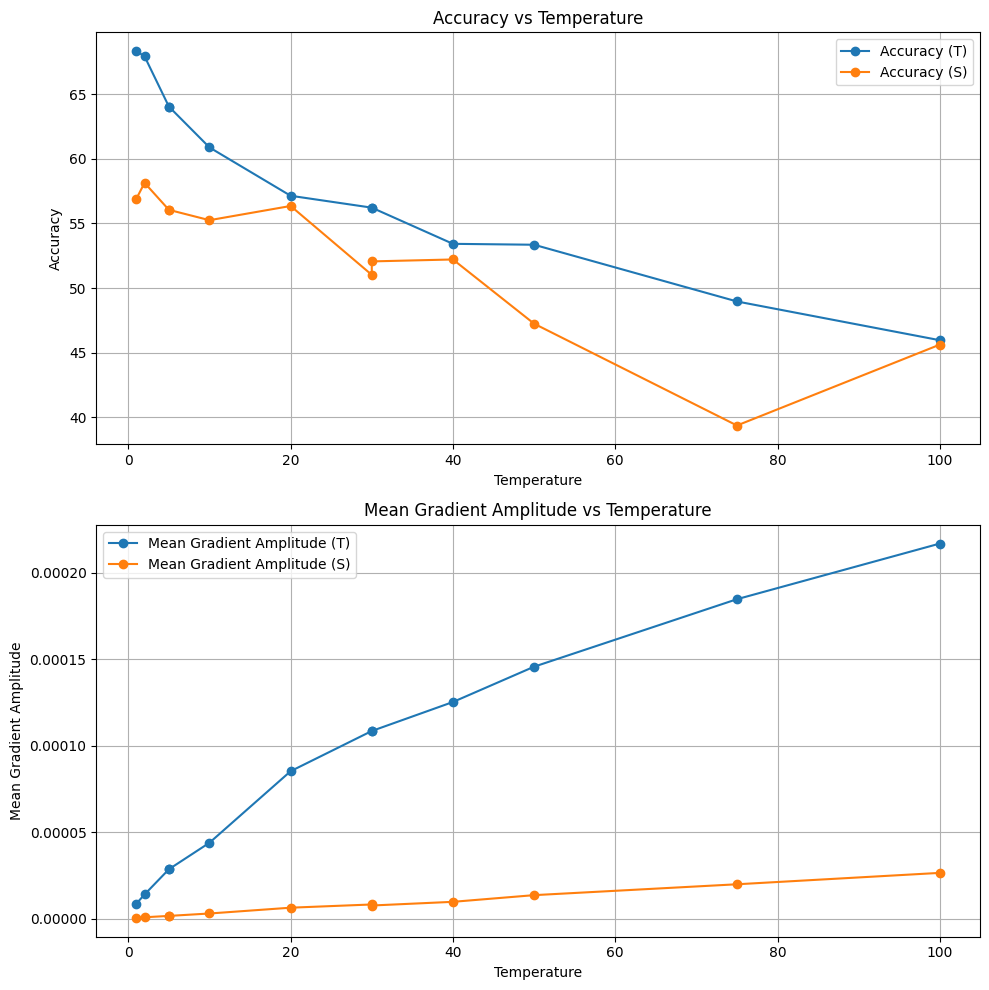

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# -----------------------------
# Subplot 1: Accuracy Metrics
# -----------------------------
ax1.plot(df["Temperature"], df["Accuracy (T)"], label="Accuracy (T)", marker='o')
ax1.plot(df["Temperature"], df["Accuracy (S)"], label="Accuracy (S)", marker='o')
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy vs Temperature")
ax1.grid(True)
ax1.legend()

# -----------------------------
# Subplot 2: Mean Gradient Amplitude Metrics
# -----------------------------
ax2.plot(df["Temperature"], df["Mean Gradient Amplitude (T)"], label="Mean Gradient Amplitude (T)", marker='o')
ax2.plot(df["Temperature"], df["Mean Gradient Amplitude (S)"], label="Mean Gradient Amplitude (S)", marker='o')
ax2.set_xlabel("Temperature")
ax2.set_ylabel("Mean Gradient Amplitude")
ax2.set_title("Mean Gradient Amplitude vs Temperature")
ax2.grid(True)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 4. Plotting with Plotly

Now we create an interactive scatter plot using Plotly. In this example, we plot the
**Batch Size** (from the hyperparameters) versus the **Adversarial Confidence** from `Eval_A`.

Hovering over the markers will show additional data from the experiment.

In [6]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

teacher_eval_cols = [
        "Metrics (JSMA)",
        "Metrics (FSGM)",
        "Metrics (DeepFool)",
        "Metrics (Pixel)"
    ]
student_eval_cols = [
    "Metrics (JSMA) S",
    "Metrics (FSGM) S",
    "Metrics (DeepFool) S",
    "Metrics (Pixel) S"
]

In [9]:
# Determine the list of metric keys from teacher columns (assumed identical for student)
metric_keys = []
for col in teacher_eval_cols:
    valid_rows = df[col].apply(lambda x: isinstance(x, dict) and bool(x))
    if valid_rows.any():
        sample_dict = df[col][valid_rows].iloc[0]
        metric_keys = list(sample_dict.keys())
        break
        
if not metric_keys:
    print("No metric keys found in teacher evaluation columns. Exiting.")
    

# Create safe versions of the metric keys (for naming new columns)
safe_metric_keys = [re.sub(r'\W+', '_', key).strip('_') for key in metric_keys]

# -- Group by Temperature --
# Grouping the data by Temperature (averaging all numeric columns) to avoid duplicate points.
# First, select numeric columns (including our new teacher/student metric columns and custom columns).
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_grouped = df.groupby("Temperature", as_index=False)[numeric_cols].mean()
df_grouped = df_grouped.sort_values("Temperature")

# Use the grouped dataframe for subsequent plotting.
df = df_grouped

# Setup grid dimensions:
# Rows represent each metric key and columns represent each evaluation method (JSMA, FSGM, DeepFool, Pixel).
n_rows = len(metric_keys)
n_cols = len(teacher_eval_cols)

# Create subplot titles for the grid.
subplot_titles = []
for eval_col in teacher_eval_cols:
    for metric in metric_keys:
        subplot_titles.append(f"{eval_col}<br>{metric}")

# Create the Plotly subplot grid.
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=subplot_titles)

# Define additional columns to show in hover info.
custom_columns = ["Epochs", "Learning Rate", "Batch Size", "Accuracy (T)"]
custom_data = df[custom_columns].values

# For each evaluation method and metric key, add teacher and student line plot traces.
for col_idx, (teach_col, stud_col) in enumerate(zip(teacher_eval_cols, student_eval_cols)):
    for row_idx, (metric, safe_metric) in enumerate(zip(metric_keys, safe_metric_keys)):
        teacher_new_col = f"{teach_col}_{safe_metric}"
        student_new_col = f"{stud_col}_{safe_metric}"
        if teacher_new_col not in df.columns:
            print(f"Column {teacher_new_col} not found in dataframe.")
            continue
        if student_new_col not in df.columns:
            print(f"Column {student_new_col} not found in dataframe.")
            continue
        # Teacher trace (solid line)
        fig.add_trace(
            go.Scatter(
                x=df["Temperature"],
                y=df[teacher_new_col],
                mode='lines',
                name=f"{teach_col} - {metric} (Teacher)",
                customdata=custom_data,
                hovertemplate=(
                    "Temperature: %{x}<br>" +
                    "Metric Value: %{y}<br>" +
                    "Epochs: %{customdata[0]}<br>" +
                    "Learning Rate: %{customdata[1]}<br>" +
                    "Batch Size: %{customdata[2]}<br>" +
                    "Accuracy (T): %{customdata[3]}<extra></extra>"
                ),
                line=dict(dash="solid"),
                showlegend=False
            ),
            row=row_idx+1, col=col_idx+1
        )
        # Student trace (dashed line)
        fig.add_trace(
            go.Scatter(
                x=df["Temperature"],
                y=df[student_new_col],
                mode='lines',
                name=f"{stud_col} - {metric} (Student)",
                customdata=custom_data,
                hovertemplate=(
                    "Temperature: %{x}<br>" +
                    "Metric Value: %{y}<br>" +
                    "Epochs: %{customdata[0]}<br>" +
                    "Learning Rate: %{customdata[1]}<br>" +
                    "Batch Size: %{customdata[2]}<br>" +
                    "Accuracy (T): %{customdata[3]}<extra></extra>"
                ),
                line=dict(dash="dash"),
                showlegend=False
            ),
            row=row_idx+1, col=col_idx+1
        )

# Layout settings for the entire grid.
fig.update_layout(
    height=300 * n_rows,
    width=350 * n_cols,
    title_text="Averaged Teacher vs. Student Metrics vs. Temperature"
)
fig.update_xaxes(title_text="Temperature")
fig.update_yaxes(title_text="Metric Value")

# Display the interactive Plotly figure.
fig.show()